# ENSEMBLE LEARNING
Thsi is a technique that combines the predictions of multiple models to improve overall performance.

It is the practice of combining multiple models to try and achieve higher overall model performance.

Ensembles can consist of multiple models trained on the same dataset. Each of these models is used to make predictions on the same input, then these predictions are aggregated across all models in some way (for example, by taking the mean) to produce the final output.

Other than the possibility of improving model performance, there are lots of other reasons why we might want to build an ensemble.

 It is essentially a form of meta-learning, where the goal is to leverage the collective knowledge of several models to achieve better results than any single model could on its own.
 
 - Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results. 
 
 - The main principle behind ensemble learning is that a group of weak learners can come together to form a strong learner, thereby increasing the accuracy of predictions. 
 
 
 - Ensemble methods can be especially powerful in reducing variance, bias, or improving predictions over single-model approaches.
 
 
 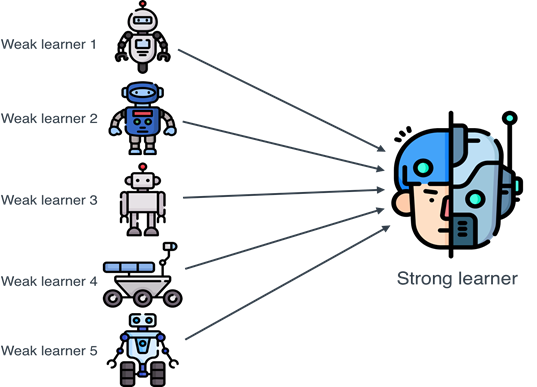
 
 
# Examples: Implementing an ensemble method using scikit-learn, we will still use the the salary_Data.csv file 

In [2]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 


In [3]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

# so Lets go ahead and Building individual models

first we will preperae our data by defining teh independent and the independent variables


We will be using the value of YearsExperience(independent variable) to try and predict the Salary (dependent variable)

In [9]:
X = data[["YearsExperience"]] # independent variable
y = data["Salary"] # dependent variable


# The we will  Split the data into training and testing sets


In [11]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's first build a simple decision tree regressor as our weak learner for comparison. 

- So we start by instantiating the regressor and go ahead and fit the model as shown below

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialise and train the decision tree
tree_model = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

- next we predict and evaluate our model as follows 

In [14]:
# Predict and evaluate
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse}")

Decision Tree MSE: 116934790.63310187


The output you provided indicates that the mean squared error (MSE) of a decision tree model trained on your data is approximately 116,934,790.63.

- Mean squared error (MSE) is a measure of the average squared difference between the actual target values and the predicted values made by the model. In the context of our regression model predicting 'Salary' based on 'YearsExperience', the MSE of approximately 116,934,790.63 suggests that, on average, the squared difference between the actual salaries and the predicted salaries made by the decision tree model is quite high.

- A high MSE value indicates that the model's predictions deviate substantially from the actual values in the dataset. This could suggest that the model may not be accurately capturing the underlying relationships between the features (such as 'YearsExperience') and the target variable ('Salary'). It could be due to various reasons such as overfitting, underfitting, or insufficient data.

# Now let us buid and ensemble model

- here we will be using  the RandomForestRegressor as our ensemble method.
- so the first step as you always know and understand is to insatiate our model
- Then after instntiating, we move ahead and fit the model as shown below (Always keep this in your fingertips)

In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialise and train the random forest
randomforest_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

- Now let us predict and evaluate 


In [17]:
forest_predictions = randomforest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
print(f"Random Forest MSE: {forest_mse}")

Random Forest MSE: 67253570.9404004


- By comparing the mean squared error (MSE) of the decision tree model with that of the random forest, we can observe the impact of using ensemble methods. Note that we used a max_depth=3 parameter in both the decision tree and random forest models, to ensure we're seeing the impact of using ensembles.
- Typically, the random forest (an ensemble method) should outperform the single decision tree due to its ability to reduce overfitting and variance in predictions. Limiting the max_depth parameter prevents overfitting the data, which could lead to individual trees being rather complex and elaborate.



- The MSE of the Random Forest model (approximately 67,253,570.94) is substantially lower than the MSE of the Decision Tree model (approximately 116,934,790.63). Here's an explanation of the differences between the two:

# Model Complexity:

- Random Forest is an ensemble learning method that constructs multiple decision trees and combines their predictions. Each decision tree in the Random Forest is trained on a bootstrap sample of the data and uses a random subset of features at each split.
- Decision Tree, on the other hand, is a single tree-based model that recursively partitions the feature space to make predictions.

# Bias-Variance Tradeoff:

- Decision Trees tend to have low bias but high variance. This means that they can capture complex relationships in the data but are prone to overfitting, leading to high variance in predictions.

- Random Forest reduces variance by averaging the predictions of multiple decision trees. By combining the predictions of multiple trees trained on different subsets of the data, Random Forest tends to generalize better to unseen data, resulting in lower variance and lower MSE.

# Ensemble Learning:

- Random Forest leverages the principle of ensemble learning by aggregating the predictions of multiple weak learners (individual decision trees). This ensemble approach often results in improved performance compared to a single decision tree, as it reduces the risk of overfitting and improves robustness.

# Prediction Accuracy:

- The lower MSE of the Random Forest model suggests that it provides more accurate predictions on average compared to the Decision Tree model. The predictions made by the Random Forest model are closer to the actual target values, indicating better performance in capturing the underlying patterns and relationships in the data.
- the lower MSE of the Random Forest model compared to the Decision Tree model suggests that Random Forest is better at generalizing to unseen data, providing more accurate predictions with lower error. This improvement is attributed to its ensemble approach, which reduces overfitting and variance in predictions.

***I hope you now understand Ensemble Learning well***

***So lets go ahead and discuss types of Ensemeble learning. With this we weill classify them to Heterogenous and homogenous*** 

# Heterogeneous ensembles
This type of ensemble consists of different types of models, so we can add pretty much any regression model we want.

Here we investigate two ways of combining models which are different in nature: voting and stacking.

# so before we even discuss about  voting and stacking, lets first train our individual models 

Thsi will include
- Linear Regression
- Decision tree
- Support Vector  Regression

# Linear Regression


In [21]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [23]:
X = dataset["YearsExperience"] # independent variable
y = dataset["Salary"] # dependent variable


- Next we scale and split our dataset into training and testing sets so that we can later evaluate the performance of the model.

In [25]:
from sklearn.preprocessing import StandardScaler
# Initialise the scalers
x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Normalise X and y
X_scaled = x_scaler.fit_transform(np.array(X)[:,np.newaxis])
y_scaled = y_scaler.fit_transform(np.array(y)[:,np.newaxis])

# Set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression
# Instantiate linear regression model
linear_reg = LinearRegression()

linear_reg.fit(x_train,y_train)

LinearRegression()

mse:  0.06858932896507035
RMSE:  0.2618956451815691


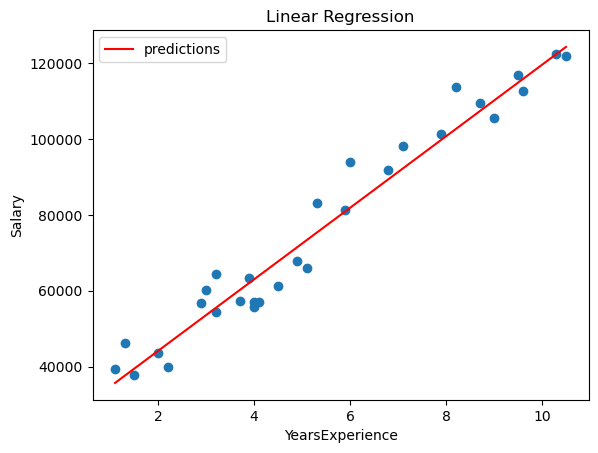

In [30]:
y_pred = linear_reg.predict(x_test)
print("mse: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the linear regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(linear_reg.predict(x_domain))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.legend()
plt.show()

- The provided MSE (Mean Squared Error) value of approximately 0.0686 and RMSE (Root Mean Squared Error) value of approximately 0.2619 suggest that the predictive model's performance is relatively good.

# Decision tree
- Create and fit the model:

In [31]:
# Instantiate regression tree model
regression_tree = DecisionTreeRegressor(max_depth=3)

regression_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

MSE:  0.16095651680926773
RMSE:  0.401193864371413


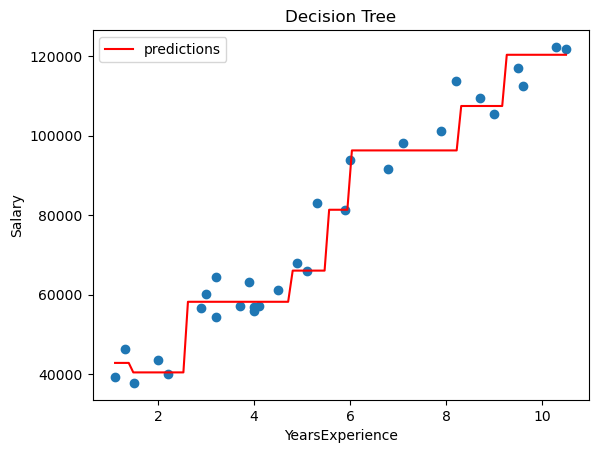

In [33]:
y_pred = regression_tree.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the regression tree prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(regression_tree.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Decision Tree")
plt.legend()
plt.show()

- The provided MSE (Mean Squared Error) value of approximately 0.161 and RMSE (Root Mean Squared Error) value of approximately 0.401 suggest that the predictive model's performance, specifically a decision tree model in this case, is moderate.


- In a step function plot, the model's predictions are represented by discrete steps rather than smooth curves. Each step corresponds to a particular interval or region defined by the predictor variables in the dataset.

- These transitions represent the decision boundaries of the tree, where the predictor variables are partitioned into subsets.

# Support vector regression
- Create and fit the model:

In [35]:
from sklearn.svm import SVR
# Instantiate support vector regression model
sv_regression = SVR(kernel='rbf', gamma='auto')

sv_regression.fit(x_train,y_train[:,0])

SVR(gamma='auto')

MSE:  0.07518555612829646
RMSE:  0.27419984706103767


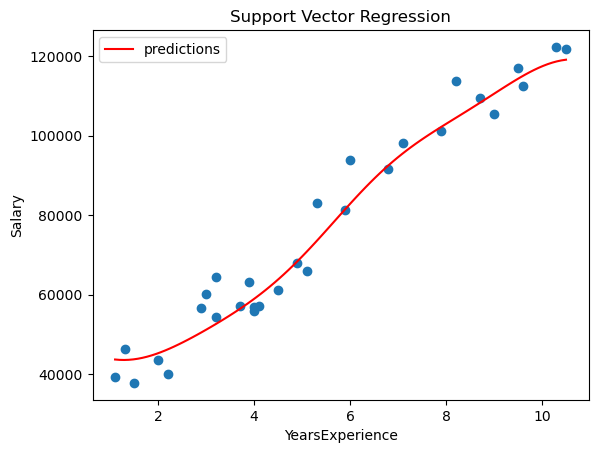

In [37]:
y_pred = sv_regression.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# Plot the SVR prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(sv_regression.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Support Vector Regression")
plt.legend()
plt.show()

- The provided MSE (Mean Squared Error) value of approximately 0.0752 and RMSE (Root Mean Squared Error) value of approximately 0.274 suggest that the performance of the Support Vector Regression (SVR) model is relatively good.

- The  step function plot, the model's predictions are represented by  smooth curves

- It implies that although the plot visually appears to have step-like characteristics, the actual predictions made by the model exhibit smooth changes or transitions between different levels or values. 

- This could indicate that the model captures underlying trends or patterns in the data in a smooth and continuous manner,

# So now let us go back to heterogenous ensembling methods


# 1. Voting
Voting involves combining individual model outputs through a kind of "majority rule" paradigm.

This process of prediction aggregation varies in the context of regression and classification tasks:

- Regression – we take the average or weighted average of all predictions.

- Classification – we use the mode of all predictions (i.e. most frequently occurring prediction).

So we can say this clearly as follows:

- Voting is a popular technique used in ensemble learning, where multiple models are combined to make predictions.

- Majority voting, or max voting, involves selecting the class label that receives the majority of votes from the individual models. 
- On the other hand, weighted voting assigns different weights to each model's prediction and combines them to make a final decision. 
- Both majority and weighted voting are methods of aggregating predictions from multiple models through a voting mechanism and strongly influence the final decision. 
- Examples of algorithms that use voting in ensemble learning include random forests and gradient boosting (although it’s an additive model “weighted” addition).
- Random forest uses decision tree models trained on different data subsets. A majority vote determines the final forecast based on individual forecasts. 


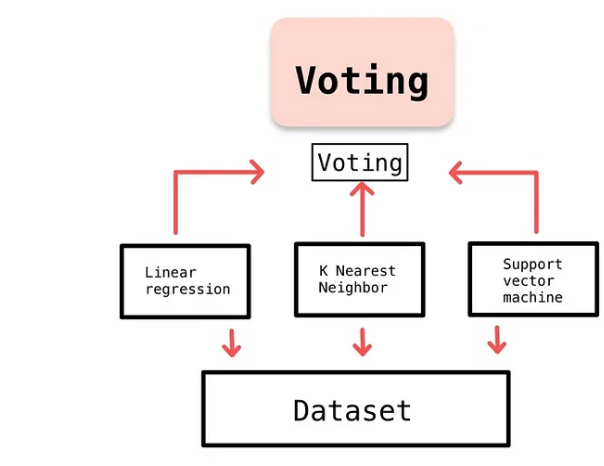

- As can be seen, algorithms in voting method are trained with the same dataset

# So let us illusatre this
- we instantiate, train, and evaluate such a voting ensemble using sklearn's VotingRegressor class.


In [39]:
# Importing the VotingRegressor class from sklearn
from sklearn.ensemble import VotingRegressor

- Define the models which we'll include in our ensemble. 
- We pass a list of tuples, which each have a string identifier for the model (arbitrary choice), along with the actual instantiated sklearn model.

In [41]:
models = [("LR",linear_reg),("DT",regression_tree),("SVR",sv_regression)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1,0.3,0.6])
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

- models = [("LR", linear_reg), ("DT", regression_tree), ("SVR", sv_regression)]: This line specifies the models to be included in the ensemble, along with their corresponding names. For example, ("LR", linear_reg) indicates that the Linear Regression model linear_reg will be referred to as "LR" in the ensemble.

- model_weightings = np.array([0.1, 0.3, 0.6]): This line specifies the weights assigned to each model in the ensemble. The weights determine the importance or contribution of each model's prediction to the final ensemble prediction. In this case, the Linear Regression model has a weight of 0.1, the Decision Tree Regression model has a weight of 0.3, and the Support Vector Regression model has a weight of 0.6.

# So we go ahead and train the model
Training the voting ensemble

In [42]:
v_reg.fit(x_train,y_train[:,0])

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=3)),
                            ('SVR', SVR(gamma='auto'))],
                weights=array([0.1, 0.3, 0.6]))

- This line trains the voting ensemble model (v_reg) using the training features (x_train) and the corresponding target variable (y_train[:,0]), where [:,0] indicates selecting the first column of the target variable if it's a multi-dimensional array.

# Now lets scheck for the the performance of the voting ensemble:

MSE:  0.09054213154394741
RMSE:  0.3009021959772767


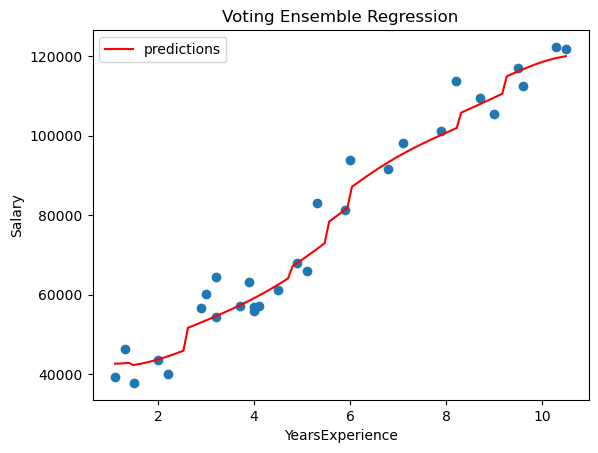

In [44]:
y_pred = v_reg.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the voting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(v_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Voting Ensemble Regression")
plt.legend()
plt.show()

- The provided MSE value of approximately 0.0905 suggests that, on average, the squared difference between the predicted values and the actual values is relatively low.
- The provided RMSE value of approximately 0.3009 indicates that, on average, the deviation of predicted values from actual values is relatively small.
- the low MSE and RMSE values suggest that the ensemble model's predictions are close to the actual values, indicating good predictive performance. This ensemble approach, which combines predictions from multiple individual models, likely helps in mitigating errors and improving the overall accuracy of the predictions compared to using any single model alone.


**N/B***
- For voting method, there are two methods of performing voting which are hard voting and soft voting. Hard voting is equivalent to majority vote, and soft voting is essentially averaging out the output of multiple algorithms. Soft voting is usually chosen as the voting method to go. The diagram below shows the mechanism of soft voting.



# b) Stacking

- Stacking is a strong ensemble learning strategy in machine learning that combines the predictions of numerous base models to get a final prediction with better performance. 
- It is also known as ***stacked ensembles*** or ***stacked generalization***. This Medium post will discuss machine learning in detail, addressing its concept, benefits, implementation, and best practices.


- The primary idea of stacking is to feed the predictions of numerous base models into a higher-level model known as the meta-model or blender, which then combines them to get the final forecast.

     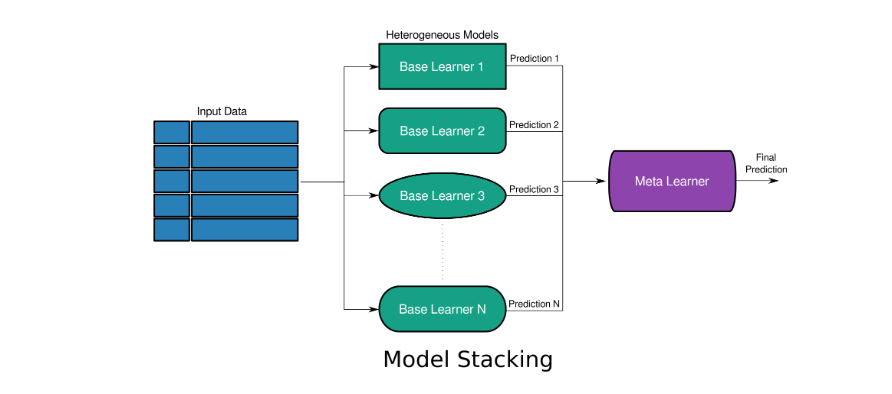



***Here’s a detailed description of how stacking works:***

- Preparing the Data: The first step is to prepare the data for modeling. This entails identifying the relevant features, cleaning the data, and dividing it into training and validation sets.
- Model Selection: The following step is to choose the base models that will be used in the stacking ensemble. A broad selection of models is typically chosen to guarantee that they produce different types of errors and complement one another.
- Training the Base Models: After selecting the base models, they are trained on the training set. To ensure diversity, each model is trained using a different algorithm or set of hyperparameters.
- Predictions on the Validation Set: Once the base models have been trained, they are used to make predictions on the validation set.
- Developing a Meta Model: The next stage is to develop a meta-model, also known as a meta learner, which will take the predictions of the underlying models as input and make the final prediction. Any algorithm, such as linear regression, logistic regression, or even a neural network, can be used to create this model.
- Training the Meta Model: The meta-model is then trained using the predictions given by the base models on the validation set. The base models’ predictions serve as features for the meta-model.
- Making Test Set Predictions: Finally, the meta-model is used to produce test set predictions. The basic models’ predictions on the test set are fed into the meta-model, which then makes the final prediction.
- Model Evaluation: The final stage is to assess the stacking ensemble’s performance. This is accomplished by comparing the stacking ensemble’s predictions to the actual values on the test set using evaluation measures such as accuracy, precision, recall, F1 score, and so on.

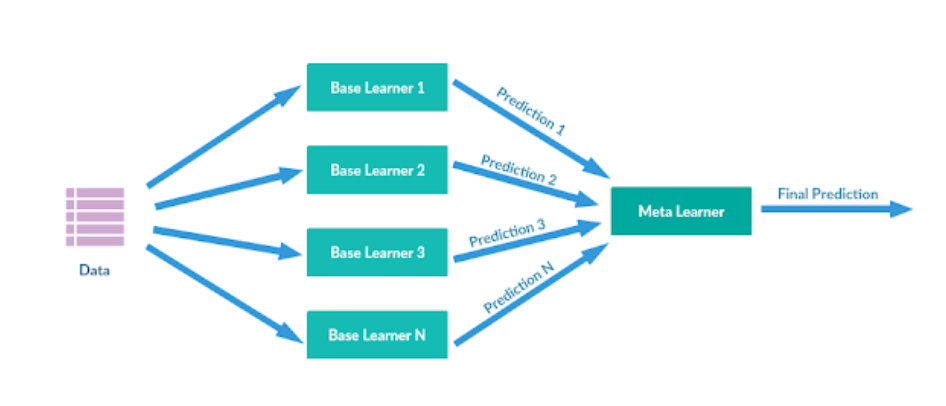

- In the end, the goal of stacking is to combine the strengths of various base models by feeding them into a meta-model, which learns how to weigh and combine their forecasts to generate the final prediction. This can frequently result in higher performance than utilizing a single model alone.

# So let us put this into coding practice and see 

-  For clarity, we declare our model list again here 

In [46]:
from sklearn.ensemble import StackingRegressor

models = [("LR",linear_reg),("DT",regression_tree),("SVR",sv_regression)]

# Instead of choosing model weightings, we now declare the meta-learner model for our stacking ensemble.  
meta_learner_reg = LinearRegression()

s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg)

- You can see that we now have our stacking ensemble declared. It contains our familiar base learners of linear regression, regression tree, and support vector regression.

- We've also declared our meta-learner as another linear regression model.

- Before we go on to fit and evaluate our model, it's important to understand what we're trading off by using stacking instead of simple voting to possibly improve our ensemble performance.
- Within the latter technique, once our base models are trained we can immediately get predictions to derive a final weighted prediction. 
- Using stacking, however, we need two training passes: one for the base learners, and then another for the meta-learner. This essentially means that we gain metric performance at the expense of extra computational requirements.

In [47]:
s_reg.fit(x_train,y_train[:,0])

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor(max_depth=3)),
                              ('SVR', SVR(gamma='auto'))],
                  final_estimator=LinearRegression())

- Let us check out perfoemmence for the stacking ensemble method 

MSE:  0.08902308600062919
RMSE:  0.29836736751968906


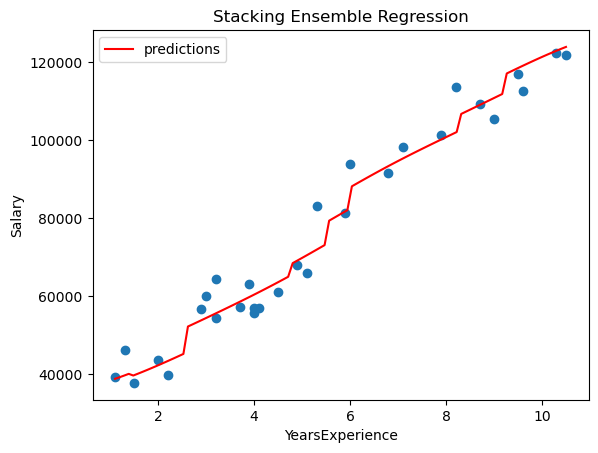

In [49]:
y_pred = s_reg.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the stacking regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(s_reg.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Stacking Ensemble Regression")
plt.legend()
plt.show()

- After fitting the Stacking Regressor to the training data and evaluating it, the resulting MSE (Mean Squared Error) of approximately 0.0890 and RMSE (Root Mean Squared Error) of approximately 0.2984 indicate the predictive performance of the ensemble model.

- The obtained MSE and RMSE values suggest that the ensemble model's predictions are relatively close to the actual values, indicating good predictive performance.

- our stacking ensemble achieves a better RMSE than the voting ensemble

# HOMOGENOUS ENSEMBLE

# # So now let us go back to Homogenous ensembling methods

- A commonly used example of an ensemble model is a random forest. 
- Random forests combine multiple homogeneous models (i.e. decision trees) to make predictions.
- In homogeneous ensemble methods (and random forest models), diversity in model performance is promoted by their ability to control the number of predictors or portion of data supplied to each model in the ensemble.


Some of the most common methods for combining homogeneous models in this way include:
- bagging
- boosting

# Bagging (AKA bootstrap aggregating)

- Bootstrap aggregation, or bagging, is a technique that improves prediction accuracy by combining predictions from multiple models.
- It involves creating random subsets of data, training individual models on each subset, and combining their predictions. However, this only happens in regression tasks. For classification tasks, the majority vote is typically used. Bagging applies bootstrap sampling to obtain the data subsets for training the base learners. 

- As such, the resulting 'bag' of models are together more stable due to decreased variance error.

- The predictions are made by aggregating the predictions of all the models in the bag.

- Bagging is a technique in which numerous instances of the same base model are trained on distinct portions of the training data. The subsets are generated via bootstrapping, which involves randomly selecting the training data with replacement. Each base model is trained on its own bootstrapped subset of data. The underlying models’ forecasts are then integrated using a voting or averaging procedure to produce the final prediction.


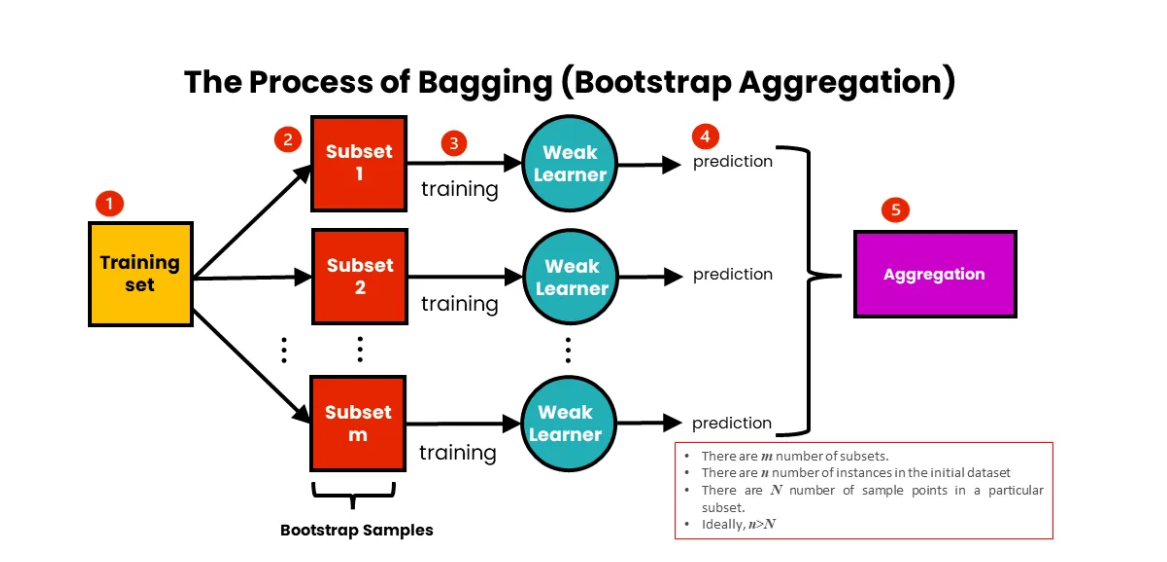



The following steps are involved in implementing bagging in machine learning:

- Select a Base Model: Select a base model that is known to perform well on a particular task. The base model should have a high variance, which indicates that it overfits the data.
- Bootstrapped Sampling: Using random sampling with replacement, create numerous subsets of the training data. The ensemble’s desired number of base models is equal to the number of subgroups formed. Each subset should be the same size as the original training data, and each data point should have an equal chance of inclusion in each subset. This is known as bootstrapped sampling, and it aids in the creation of variety among base models.
- Base Model Training: Independently train each base model on its bootstrapped subset of training data. Fitting the base model to the subset of data and deriving the model parameters or weights is what this entails.
- Combination of Prediction Models: Once all of the base models have been trained, they may be utilized to make predictions on the test data. To create the final prediction, the predictions of the base models can be integrated using a voting or averaging approach. The most popular strategy for classification issues is to employ majority voting, in which the class with the most votes from the base models is chosen as the final prediction. The predictions for regression issues can be averaged to give the final forecast.
- Evaluation and Performance Analysis: Depending on the kind of problem, evaluate the performance of the bagged ensemble model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or RMSE. To evaluate the improvement in model performance, compare the performance of the bagged ensemble model to the performance of the base model.
- To further optimize model performance, fine-tune the hyperparameters of the basic model and the bagging ensemble. Experiment with different hyperparameter values to identify the optimum combination for the given problem, such as the number of base models in the ensemble, the sample ratio for bootstrapped sampling, and the type of prediction combination scheme.

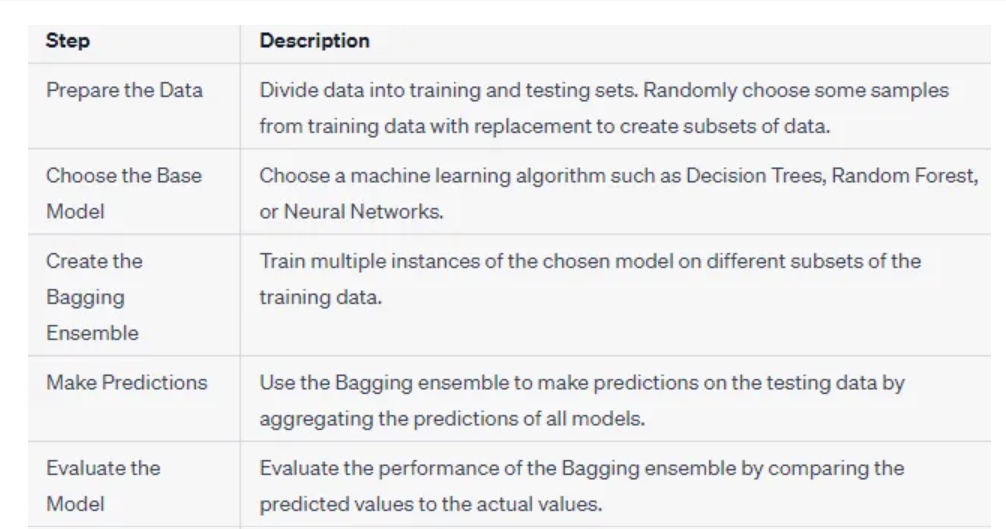

# Let us now  implement such a bagging ensemble using sklearn's BaggingRegressor class.

In [50]:
# Importing the BaggingRegressor class from sklearn
from sklearn.ensemble import BaggingRegressor

Building the bagging ensemble:

- Here, we pick what base model to use in our ensemble.

In [55]:
# Instantiate decision tree regression model to use as the base model
decision_tree = DecisionTreeRegressor(max_depth=4)

# Instantiate BaggingRegressor model with a decision tree as the base model
bag_regression = BaggingRegressor(estimator = decision_tree)

- The code initializes a Decision Tree Regression model (d_tree) with a maximum depth of 4. Then, it creates a Bagging Regressor (bag_reg) ensemble model, using the Decision Tree Regression model as its base, aimed at improving prediction accuracy through bootstrapping and aggregation techniques.

# We now fit our model

In [56]:
bag_regression.fit(x_train,y_train[:,0])

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4))

- Checking the performance of the bagging ensemble

MSE:  0.10075505516991308
RMSE:  0.31741936798171766


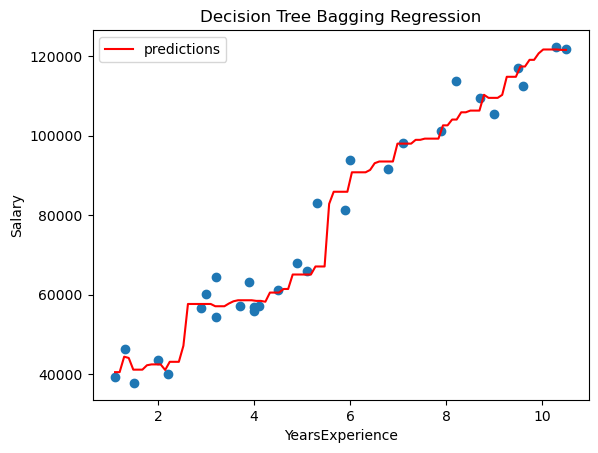

In [60]:
y_pred = bag_regression.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the bagging regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bag_regression.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Decision Tree Bagging Regression")
plt.legend()
plt.show()

- The MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) values of 0.1008 and 0.3174, respectively, suggest that the Bagging Regression model performs reasonably well.

# b) Boosting

- Boosting ensembles are built by combining multiple 'weak models' (for example, a decision tree with a depth of 1) in a sequential fashion.

- Each model is built from the previous model's training set. This training set is selected through weighted sampling (with replacement) where the weights are the previous model's prediction errors (for example, residuals) on individual training samples.

- The final predictions are then made by aggregating the individual predictions of all the models in the ensemble.-


- Boosting involves successively training models so that each one tries to fix the mistakes of the one before it. Predictions are derived from the weighted sum of the models, which are ranked according to how accurate they are. AdaBoost, gradient boosting, and XGBoost are a few examples.

- Boosting involves sequentially training weak learners. Here, each subsequent learner improves the errors of previous learners in the sequence. A sample of data is first taken from the initial dataset.

- This sample is used to train the first model, and the model makes its prediction. The samples can either be correctly or incorrectly predicted. The samples that are wrongly predicted are reused for training the next model. In this way, subsequent models can improve on the errors of previous models.

- Unlike bagging, which aggregates prediction results at the end, boosting aggregates the results at each step. They are aggregated using weighted averaging.

- Using weighted averaging, each model is assigned a different weight based on how well it predicts the future. Stated differently, it assigns greater weight to the model possessing the highest predictive power. This is due to the fact that the learner deemed most significant is the one with the most predictive power.

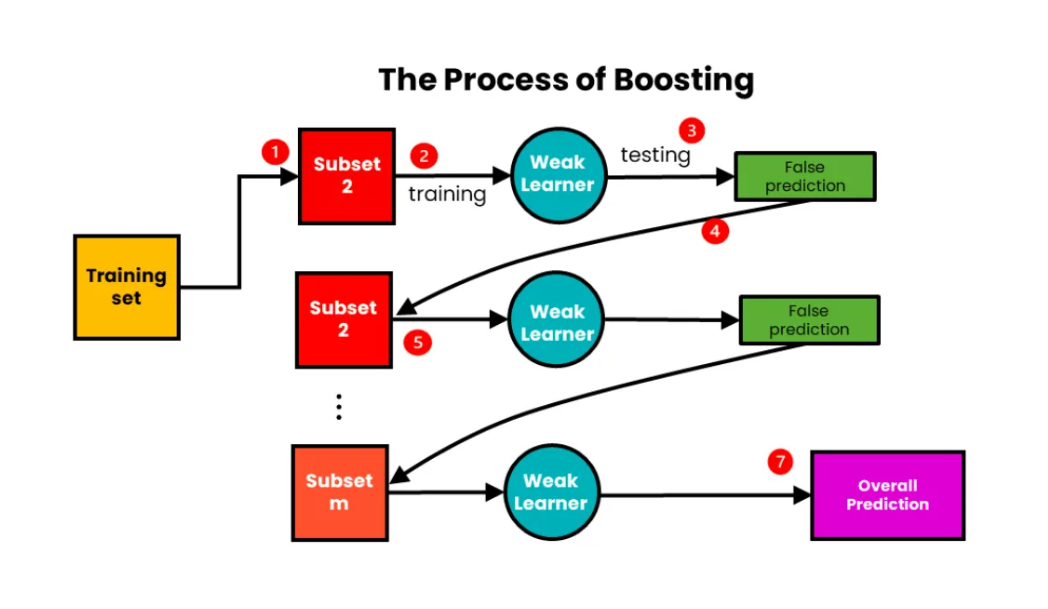



# Let's see how this is implemented in sklearn using the AdaBoostRegressor class.

In [61]:
# Importing the AdaBoostRegressor class from sklearn
from sklearn.ensemble import AdaBoostRegressor

Building the boosting ensemble:

- Again, we pick what base model to use in our ensemble.



In [62]:
# Instantiate decision tree regression model to use as the base model
decision_tree = DecisionTreeRegressor(max_depth=3)

# Instantiate AdaBoostRegressor model with a decision tree as the base model
bst_regression = AdaBoostRegressor(estimator = decision_tree)

- fit our model

In [64]:
bst_regression.fit(x_train,y_train[:,0])


AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

MSE:  0.1177138538930332
RMSE:  0.34309452617760194


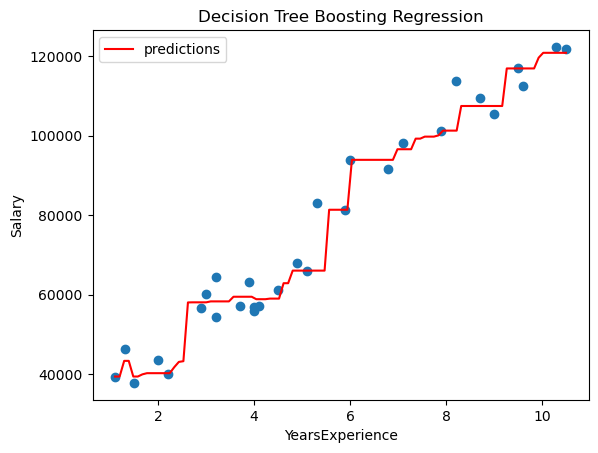

In [66]:
y_pred = bst_regression.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test,y_pred)))

# plot the boosting regression prediction line over data
x_domain = np.linspace(min(x_train),max(x_train),100)

y_pred_rescaled = y_scaler.inverse_transform(bst_regression.predict(x_domain).reshape(-1, 1))
x_rescaled = x_scaler.inverse_transform(x_domain)

plt.figure()
plt.scatter(X, y)
plt.plot(x_rescaled, y_pred_rescaled, color="red", label='predictions')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Decision Tree Boosting Regression")
plt.legend()
plt.show()

Comparing the Bagging Regression model with MSE of approximately 0.1008 and RMSE of approximately 0.3174 to the new Bagging model with MSE of approximately 0.1177 and RMSE of approximately 0.3431, we observe a slight increase in both error metrics for the latter. This indicates that the new Bagging model may have slightly worse predictive performance compared to the previous one.

# Advantage of the Ensemble model.

Ensemble models have several advantages over single models, including:

- Improved accuracy: Ensemble models can improve the accuracy of predictions compared to a single model. By combining multiple models, the ensemble can leverage the strengths of each individual model while mitigating their weaknesses, resulting in a more accurate and robust model.
- Reduced overfitting: Ensemble models can help reduce the risk of overfitting, which is a common problem in machine learning where a model learns the training data too well and fails to generalize to new data. By combining multiple models, the ensemble can reduce the variance in the predictions, making the model more robust and less prone to overfitting.
- Increased stability: Ensemble models tend to be more stable and reliable than single models, as they are less sensitive to fluctuations in the training data or model parameters. This is because the ensemble aggregates the predictions of multiple models, which can smooth out any noise or errors in the individual predictions.
- Flexibility: Ensemble models can be used with a wide range of algorithms and techniques, and can be tailored to specific problems and data types. This flexibility allows ensemble models to be applied in a wide range of domains and applications.
- Easy to implement: Ensemble models are relatively easy to implement, especially with the availability of popular machine learning libraries that provide built-in support for ensemble methods. This makes it easy for practitioners to incorporate ensemble methods into their workflows and improve the performance of their models.

Overall, ensemble models are a powerful tool for improving the accuracy and robustness of machine learning models. They are widely used in many domains and applications, and have become a staple technique in the machine learning toolbox.

# Disadvantages of Ensemble methods.
- Complexity: Ensemble methods can be more complex than individual models, which can make them more difficult to understand and interpret.
- Computation time: Building an ensemble of models can be computationally expensive, especially for large datasets and complex models.
- Selection of weak learners: The performance of ensemble methods depends heavily on the choice of weak learners. If weak learners are not diverse enough or not appropriate for the problem, the ensemble method may not perform well.